In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.word2vec import PathLineSentences, LineSentence, Word2Vec
from pathlib import Path
import networkx as nx
from sklearn import model_selection, linear_model, preprocessing, svm
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import make_pipeline
%matplotlib inline


In [29]:
def read_errors(m, wl, nw):
    fname = m +"-max-errors"+ "-wl" + str(wl) + "-nw" + str(nw)
    print(fname)
    rws = np.concatenate([
        np.loadtxt(f.open(), delimiter='\t', dtype=float)
        for f in rw_location.glob(fname + ".txt")
        if f.stat().st_size > 0
    ])
    return rws

m1
m1-max-errors-wl5-nw50
m2
m2-max-errors-wl5-nw50
m3
m3-max-errors-wl5-nw50
m4
m4-max-errors-wl5-nw50


<function matplotlib.pyplot.show>

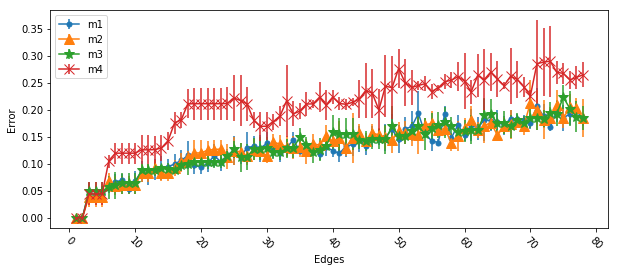

In [30]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
methods = ["m1", "m2", "m3", "m4"]
nmethods = len(methods)
wl = 5
nw = 50
# rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/output/karate-2nd")
rw_location = Path("/Users/Ganymedian/Desktop/dynamic-rw/output/karate-with-error")
formats=['.-', '^-', '*-','x-']

for mm in range(nmethods):
    print(methods[mm])
    all_errors = read_errors(methods[mm], wl, nw)
    x_axis = np.arange(1, all_errors.shape[1]+1)
    means = np.mean(all_errors,axis=0)
    stdv = np.std(all_errors, axis=0)
    plt.errorbar(x_axis, means, yerr=stdv, fmt=formats[mm], label=methods[mm], ms=10)
    plt.xticks(rotation=-45)
    plt.legend()

plt.xlabel("Edges")
plt.ylabel("Error")
plt.show